In [1]:

import torch
from torch import nn

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
import matplotlib.pyplot as plt

import torchsde

def plot(ts, samples, xlabel, ylabel, title=''):
    ts = ts.cpu()
    samples = samples.squeeze().t().cpu()
    plt.figure()
    for i, sample in enumerate(samples):
        plt.plot(ts, sample, marker='x', label=f'sample {i}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [2]:
class SDE(nn.Module):

    def __init__(self):
        super().__init__()
        self.theta = nn.Parameter(torch.tensor(0.1), requires_grad=True)  # Scalar parameter.
        self.noise_type = "diagonal"
        self.sde_type = "ito"
    
    def f(self, t, y):
        return torch.sin(t) + self.theta * y
    
    def g(self, t, y):
        return 0.3 * torch.sigmoid(torch.cos(t) * torch.exp(-y))

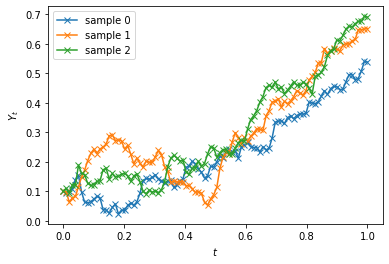

In [4]:
batch_size, state_size, t_size = 3, 1, 100
sde = SDE()
ts = torch.linspace(0, 1, t_size)
y0 = torch.full(size=(batch_size, state_size), fill_value=0.1)

with torch.no_grad():
    ys = torchsde.sdeint(sde, y0, ts, method='euler')  # (t_size, batch_size, state_size) = (100, 3, 1).

plot(ts, ys, xlabel='$t$', ylabel='$Y_t$')